In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# <span style='background:yellow'>Auditory Clusters<span>

In [8]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/Three_Auditory_clusters_2.csv')
df

,Timing.level,Cluster.1,Timing.level2,Cluster.2,Timing.level3,Cluster.3
0,Single duration timing,0.90,Single duration timing,0.81,Single duration timing,0.95
1,Single duration timing,0.86,Single duration timing,0.76,Single duration timing,0.67
2,Single duration timing,0.95,Single duration timing,0.86,Single duration timing,0.76
3,Single duration timing,0.76,Single duration timing,0.81,Single duration timing,0.86
4,Single duration timing,0.76,Single duration timing,0.86,Single duration timing,0.81
...,...,...,...,...,...,...
172,NaN,NaN,Beat-based timing,0.43,NaN,NaN
173,NaN,NaN,Beat-based timing,0.38,NaN,NaN
174,NaN,NaN,Beat-based timing,0.29,NaN,NaN
175,NaN,NaN,Beat-based timing,0.43,NaN,NaN


In [9]:
import re

df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)

df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)

df3=df.iloc[:,4:6].dropna()
df3['Cluster']='cluster3'
df3.rename(columns={'Cluster.3':'value','Timing.level3':'Timing.level'},inplace=True)
df_final=pd.concat([df1,df2,df3],axis=0).reset_index(drop=True)
df_final

,Timing.level,value,Cluster
0,Single duration timing,0.90,cluster1
1,Single duration timing,0.86,cluster1
2,Single duration timing,0.95,cluster1
3,Single duration timing,0.76,cluster1
4,Single duration timing,0.76,cluster1
...,...,...,...
418,Beat-based timing,0.76,cluster3
419,Beat-based timing,0.57,cluster3
420,Beat-based timing,0.57,cluster3
421,Beat-based timing,0.71,cluster3


<Figure size 300x400 with 0 Axes>

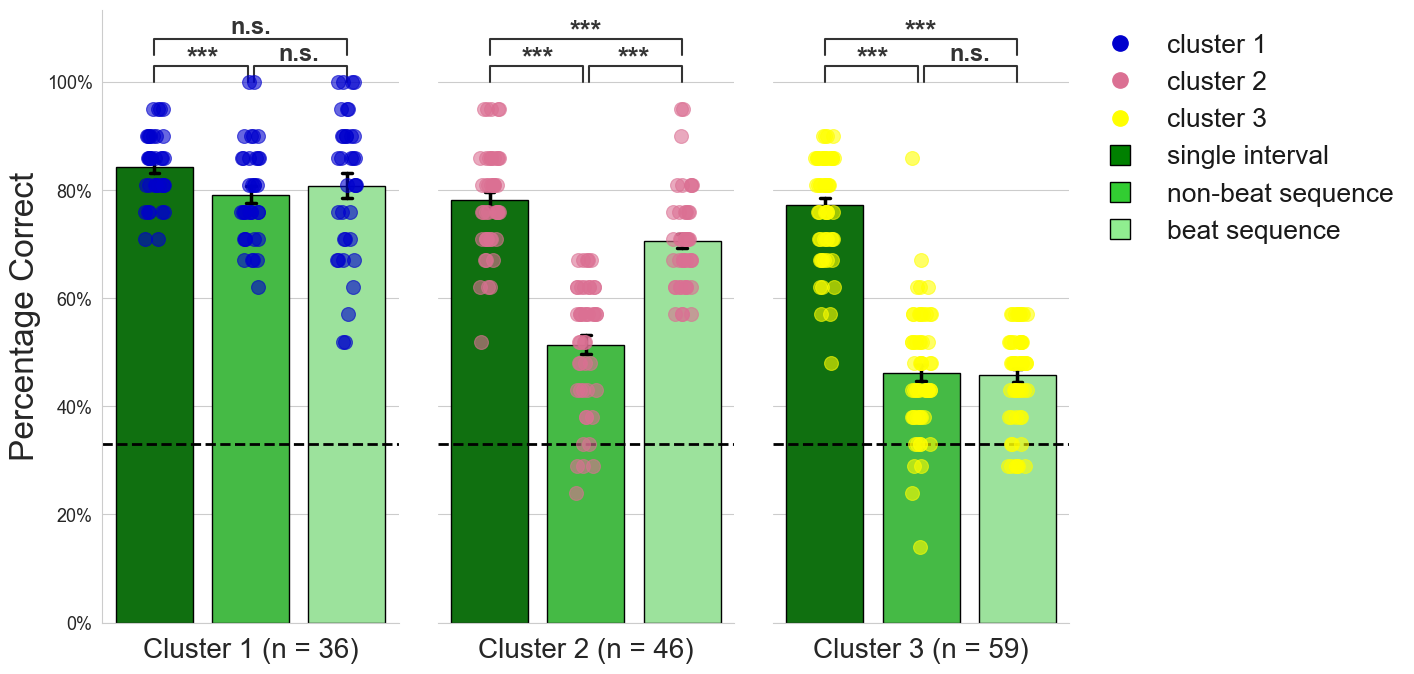

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=df_final,x='Timing.level',y='value',kind='bar',col='Cluster', col_order=['cluster1','cluster3','cluster2'],
              errorbar='se', palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=2.5, capsize = 0.1, height=7, aspect=0.5,alpha=1,
              legend=False, sharey=True, sharex=True, margin_titles=False) #ci = "sd"
colors = ['mediumblue', 'palevioletred', 'yellow']  # Example markers for the first, second, and third axes

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]
    sns.stripplot(ax=ax, x='Timing.level', y='value', data=df_final[df_final['Cluster'] == cluster_name],
                  dodge=True, alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])
    
############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Cluster 1 (n = 36)',alpha=1,size=20) 
g.axes[0,1].set_xlabel('Cluster 2 (n = 46)',alpha=1,size=20) 
g.axes[0,2].set_xlabel('Cluster 3 (n = 59)',alpha=1,size=20) 
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Auditory clusters',size=25, y=1.01)
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['cluster 1', 'cluster 2', 'cluster 3','single interval', 'non-beat sequence','beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['mediumblue', 'palevioletred', 'yellow', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=19, labelcolor='0.1', title='',title_fontsize=16)

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(df_final['value'])

g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.09, s='n.s.',ha='center',size=17,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=17,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.08, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].text(x=1,y=max_val+0.08, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=17,weight='bold',color='0.2')


### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/auditory_clusters_barplot.png'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/auditory_clusters_barplot.png', bbox_inches='tight',dpi=400)
plt.show()



# <span style= background:yellow> Visual clusters

In [18]:
dfv=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/Two_Visual_clusters_2.csv')
dfv.head(3)

,Timing.level,Cluster.1,Timing.level2,Cluster.2
0,Single duration timing,0.81,Single duration timing,0.57
1,Single duration timing,0.86,Single duration timing,0.52
2,Single duration timing,0.86,Single duration timing,0.67


In [19]:
import re

df1=dfv.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)

df2=dfv.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)

df_finalv=pd.concat([df1,df2],axis=0).reset_index(drop=True)
df_finalv

,Timing.level,value,Cluster
0,Single duration timing,0.81,cluster1
1,Single duration timing,0.86,cluster1
2,Single duration timing,0.86,cluster1
3,Single duration timing,0.67,cluster1
4,Single duration timing,0.86,cluster1
...,...,...,...
418,Beat-based timing,0.43,cluster2
419,Beat-based timing,0.33,cluster2
420,Beat-based timing,0.43,cluster2
421,Beat-based timing,0.43,cluster2


<Figure size 300x400 with 0 Axes>

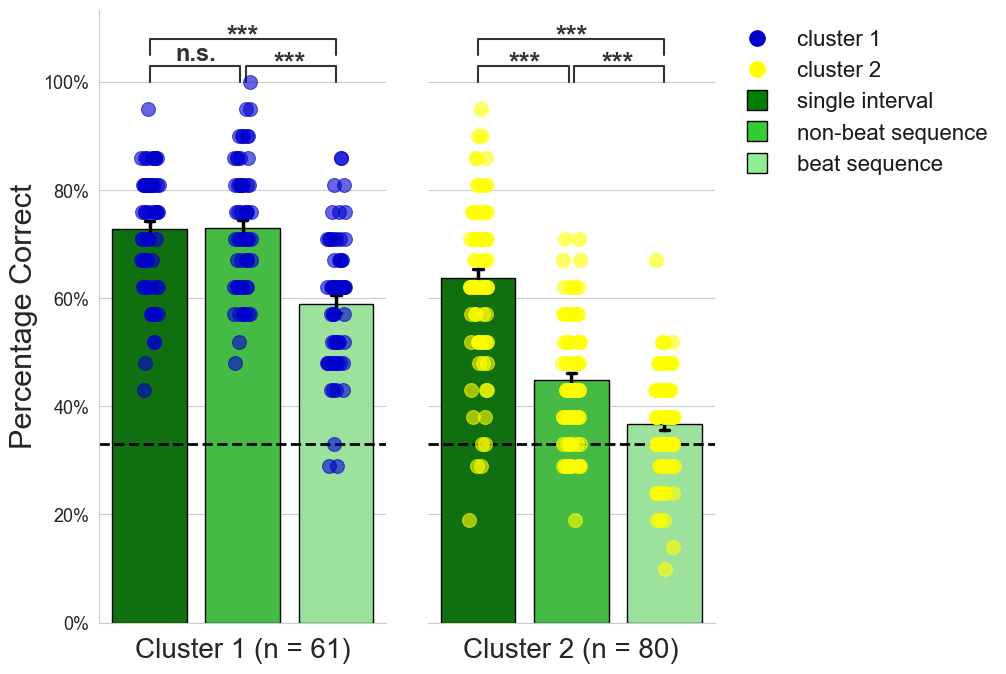

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=df_finalv,x='Timing.level',y='value',kind='bar',col='Cluster',
              errorbar = 'se', palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=2.5, capsize = 0.1, height=7, aspect=0.5,alpha=1,
              legend=False, sharey=True, sharex=True, margin_titles=False) #ci = "sd"
colors = ['mediumblue', 'yellow']  # Example markers for the first, second, and third axes

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]
    sns.stripplot(ax=ax, x='Timing.level', y='value', data=df_finalv[df_finalv['Cluster'] == cluster_name],
                  dodge=True, alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=22)
g.set_titles('')
g.axes[0,0].set_xlabel('Cluster 1 (n = 61)',alpha=1,size=20)
g.axes[0,1].set_xlabel('Cluster 2 (n = 80)',alpha=1,size=20)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Visual clusters',size=25, y=1)
sns.despine(ax=g.axes[0, 1], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['cluster 1', 'cluster 2','single interval', 'non-beat sequence','beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['mediumblue', 'yellow', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 2
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=16, labelcolor='0.1', title='',title_fontsize=16)

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(df_finalv['value'])

g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='n.s.',ha='center',size=17,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/visual_clusters_barplot.png'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/visual_clusters_barplot.png', bbox_inches='tight',dpi=400)
plt.show()


# <span style='background:yellow'> Tactile clusters

In [21]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/Three_Tactile_clusters_2.csv')
df.head(3)

,Timing.level,Cluster.1,Timing.level2,Cluster.2,Timing.level3,Cluster.3
0,Single duration timing,0.71,Single duration timing,0.81,Single duration timing,0.62
1,Single duration timing,0.76,Single duration timing,0.86,Single duration timing,0.67
2,Single duration timing,0.71,Single duration timing,0.81,Single duration timing,0.71


In [22]:
import re
# def change(df):
#     re.findall(r'\d+', df)
# #     for i in :
#         df['Cluster']='cluster'+str(i)
#         df.rename(columns={df.iloc[:,0]:'Timing.level',df.iloc[:,1]:'value'})
df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)
df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)
df3=df.iloc[:,4:6].dropna()
df3['Cluster']='cluster3'
df3.rename(columns={'Cluster.3':'value','Timing.level3':'Timing.level'},inplace=True)
df_finalt=pd.concat([df1,df2,df3],axis=0).reset_index(drop=True)
df_finalt

,Timing.level,value,Cluster
0,Single duration timing,0.71,cluster1
1,Single duration timing,0.76,cluster1
2,Single duration timing,0.71,cluster1
3,Single duration timing,0.81,cluster1
4,Single duration timing,0.86,cluster1
...,...,...,...
418,Beat-based timing,0.67,cluster3
419,Beat-based timing,0.29,cluster3
420,Beat-based timing,0.52,cluster3
421,Beat-based timing,0.33,cluster3


<Figure size 300x400 with 0 Axes>

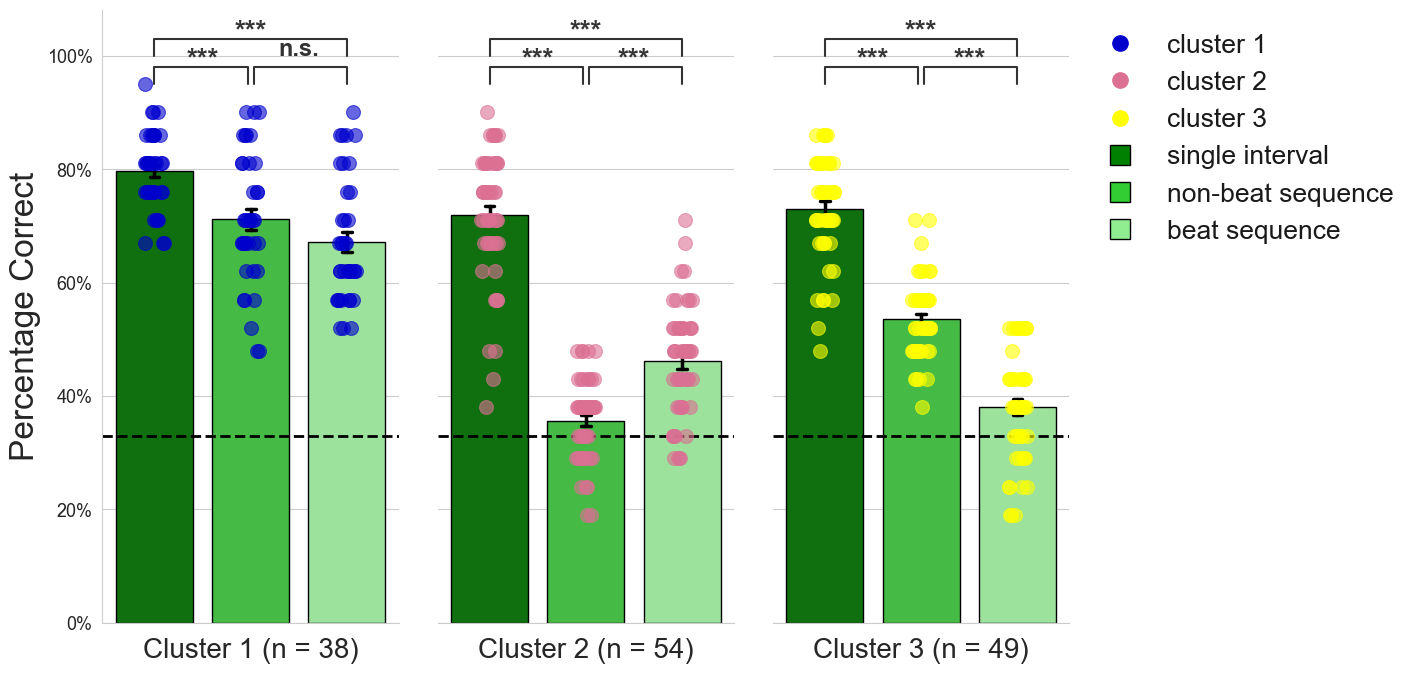

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=df_finalt,x='Timing.level',y='value',kind='bar',col='Cluster', col_order=['cluster2','cluster3','cluster1'],
              errorbar = 'se', palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=2.5, capsize = 0.1, height=7, aspect=0.5,alpha=1,
              legend=False, sharey=True, sharex=True, margin_titles=False) #ci = "sd"
colors = ['mediumblue', 'palevioletred', 'yellow']  # Example markers for the first, second, and third axes

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]
    sns.stripplot(ax=ax, x='Timing.level', y='value', data=df_finalt[df_finalt['Cluster'] == cluster_name],
                  dodge=True, alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Cluster 1 (n = 38)',alpha=1,size=20)
g.axes[0,1].set_xlabel('Cluster 2 (n = 54)',alpha=1,size=20)
g.axes[0,2].set_xlabel('Cluster 3 (n = 49)',alpha=1,size=20)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Tactile clusters',size=25, y=1.01)
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['cluster 1', 'cluster 2', 'cluster 3','single interval', 'non-beat sequence','beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['mediumblue', 'palevioletred', 'yellow', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=19, labelcolor='0.1', title='',title_fontsize=16)

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(df_finalt['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.08, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.05, s='n.s.',ha='center',size=17,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.08, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].text(x=1,y=max_val+0.08, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=1.5,y=max_val+0.03, s='***',ha='center',size=20,weight='bold',color='0.2')

### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/tactile_clusters_barplot.png'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/tactile_clusters_barplot.png', bbox_inches='tight',dpi=400)
plt.show()
